In [ ]:
# journalist
# sociologist
# politicol consultants


#deliverables
# presenttion for a non technical audience
# readme markdown file telling your story OR jupyter notebook with markdown for a nontech audience
# script with helper functions
# a graph or two



In [41]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.functions import col, array_contains
import datetime
from pyspark.sql.functions import year, month, dayofmonth
import pandas as pd
import matplotlib.pyplot as plt


In [2]:


spark = ps.sql.SparkSession.builder \
            .master("local[2]") \
            .appName("Spark Session Intro") \
            .getOrCreate()

sc = spark.sparkContext 

In [2]:
sc.getConf().getAll()

[('spark.driver.extraJavaOptions',
  '"-Dio.netty.tryReflectionSetAccessible=true"'),
 ('spark.driver.port', '38641'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', '1d74aa07c89c'),
 ('spark.app.id', 'local-1616722037801'),
 ('spark.sql.warehouse.dir',
  'file:/home/jovyan/work/RPP/CaseStudies/FrenchElectionTweets/spark-warehouse'),
 ('spark.executor.extraJavaOptions',
  '"-Dio.netty.tryReflectionSetAccessible=true"'),
 ('spark.app.name', 'Spark Session Intro'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.startTime', '1616722036970'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.master', 'local[2]')]

In [3]:

frenchtweets_df = spark.read.json('data/french_tweets.json')

In [6]:
frenchtweets_df.take(1)
#macroon
#  Emmanuel Macron of En Marche! (EM) and Marine Le Pen of the National Front (FN),


[Row(contributors=None, coordinates=None, created_at='Wed Apr 26 13:30:45 +0000 2017', display_text_range=None, entities=Row(hashtags=[], media=None, symbols=[], urls=[], user_mentions=[]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=857225437122097152, id_str='857225437122097152', in_reply_to_screen_name=None, in_reply_to_status_id=None, in_reply_to_status_id_str=None, in_reply_to_user_id=None, in_reply_to_user_id_str=None, is_quote_status=False, lang='fr', limit=None, place=Row(bounding_box=Row(coordinates=[[[-0.061141, 49.208997], [-0.061141, 49.250115], [-0.032199, 49.250115], [-0.032199, 49.208997]]], type='Polygon'), country='France', country_code='FR', full_name='Dozulé, France', id='4da693e9b39923ab', name='Dozulé', place_type='city', url='https://api.twitter.com/1.1/geo/id/4da693e9b39923ab.json'), possibly_sensitive=None, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, retweet_count=0, r

In [16]:
#frenchtweets_df.take(2)[0]#.select('full_name')
ft_df = frenchtweets_df.createOrReplaceTempView('ft')
out = frenchtweets_df.select('text').take(4)
#print(len([print(row) for row in out.collect()]))
print(out)
#print('___'*10)
#print(out.show())

[Row(text='Je comprends pas trop la fin de 13 reasons why 😓'), Row(text='@julesbl99 travailles au lieu de raconter ta vie'), Row(text="@lecho_fr @lasaucelleoff J'espère faire mieux mais c'est pas sûr dieu seul le sait"), Row(text="362 jours par an je suis adorable, aujourd'hui ne fait pas parti de ces 362.... 😡😡")]


In [30]:
#Emmanuel Macron of En Marche! (EM) and Marine Le Pen of the National Front (FN),
# elections: April 23rd, and May 7th
macron_mentions = frenchtweets_df.filter((col('text').contains('macron')) |
                                         (col('text').contains('emmanuel')) |
                                         (col('text').contains('EM')) |
                                         (col('text').contains('marche'))).select('text').take(4)

In [43]:
macron_mentions_gb = frenchtweets_df.filter((col('text').contains('macron')) |
                                         (col('text').contains('emmanuel')) |
                                         (col('text').contains('EM')) |
                                         (col('text').contains('marche'))).groupby('created_at').count()

In [44]:
macron_mentions_array = macron_mentions_gb.collect()

In [28]:
frenchtweets_df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- display_url: string (nullable = true)
 |    |    |    |-- expanded_url: string (nullable = true)
 |    |    |    |-- id: long (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |

In [46]:
macron_mentions_array[:20]

[Row(created_at='Thu Apr 27 07:29:01 +0000 2017', count=2),
 Row(created_at='Thu Apr 27 13:05:22 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 15:42:51 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 17:17:56 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 18:56:33 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 06:45:04 +0000 2017', count=2),
 Row(created_at='Fri Apr 28 09:09:34 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 09:56:46 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 10:41:52 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 11:25:26 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 14:47:52 +0000 2017', count=1),
 Row(created_at='Fri Apr 28 15:30:57 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 12:10:29 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 16:46:51 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 17:20:12 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 18:18:56 +0000 2017', count=1),
 Row(created_at='Thu Apr 27 19:35:43 +00

In [4]:
df = frenchtweets_df.toPandas()

In [16]:
tweets_df = df[['created_at','text']]

In [17]:
tweets_df['Time Period'] = pd.to_datetime(tweets_df['created_at']).dt.strftime('%d-%H')

<ipython-input-17-24de8cd6a44e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['Time Period'] = pd.to_datetime(tweets_df['created_at']).dt.strftime('%d-%H')


In [10]:
#tweets_df['mdh'] = pd.to_datetime(tweets_df['created_at']).dt.strftime('%m%d%H')

<ipython-input-10-522c1bc62edc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['mdh'] = pd.to_datetime(tweets_df['created_at']).dt.strftime('%m%d%H')


In [14]:
#tweets_df.loc['md'] = pd.to_datetime(tweets_df['created_at']).dt.strftime('%m%d')

In [15]:
#tweet_group = tweets_df.groupby('Time Period').count()

,created_at,text
mdh,,
042613,678,678
042614,2234,2234
042615,5353,5353
042616,1386,1386
042617,5141,5141
...,...,...
042901,422,422
042902,450,450
042903,428,428


In [18]:
tweet_group = tweets_df.groupby('Time Period').count()

Text(0.5, 1.0, 'Number of Tweets Per Hour')

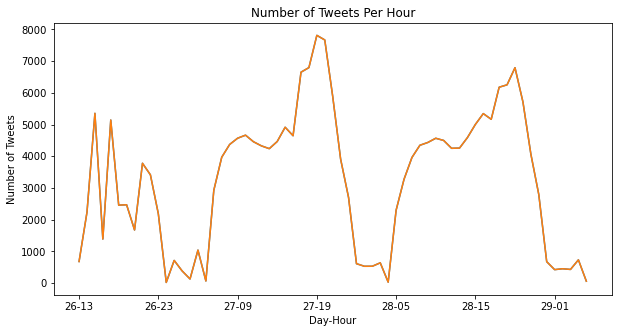

In [20]:
ax = tweet_group.plot(kind='line',figsize=(10,5),legend=None)
ax.set_xlabel('Day-Hour')
ax.set_ylabel('Number of Tweets');
ax.set_title('Number of Tweets Per Hour')


In [22]:
fig = ax.get_figure()
fig.savefig("alltweets.png")

In [23]:
def candidatesearch(lst):
    return '|'.join(lst)

In [56]:
search_macron  = ['macron','emmanuel', 'marche','République','Republique']
search_lepen = ['marine', 'national','rally', 'le pen', 'lepen']
pd.options.display.max_colwidth = 1000
tweets_df.loc[tweets_df['text'].str.contains(candidatesearch(search_macron), case=False, na=False), 'macron'] = True
tweets_df.loc[tweets_df['text'].str.contains(candidatesearch(search_lepen), case=False, na=False), 'lepen'] = True
macron_tweets = tweets_df[tweets_df['macron'] == True].groupby('Time Period').count()
lepen_tweets = tweets_df[tweets_df['lepen'] == True].groupby('Time Period').count()
both_tweets = tweets_df[(tweets_df['lepen'] == True) & (tweets_df['macron'] == True)].groupby('Time Period').count()

In [34]:
macron_tweets

,created_at,text,candidate,macron,lepen
Time Period,,,,,
26-13,46,46,46,46,6
26-14,144,144,144,144,4
26-15,228,228,228,228,15
26-16,61,61,61,61,3
26-17,189,189,189,189,12
...,...,...,...,...,...
29-01,4,4,4,4,0
29-02,21,21,21,21,0
29-03,23,23,23,23,0


In [36]:
lepen_tweets

,created_at,text,candidate,macron,lepen
Time Period,,,,,
26-13,15,15,15,6,15
26-14,27,27,27,4,27
26-15,67,67,67,15,67
26-16,12,12,12,3,12
26-17,39,39,39,12,39
...,...,...,...,...,...
29-01,2,2,2,0,2
29-02,5,5,5,0,5
29-03,2,2,2,0,2


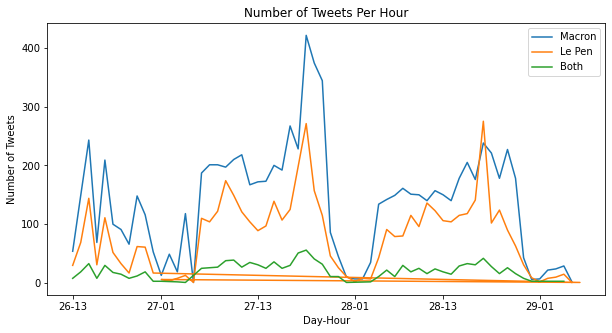

In [70]:
fig, ax2 = plt.subplots(1,1,figsize=(10,5))
ax2.plot(macron_tweets['created_at'],label='Macron')
ax2.plot(lepen_tweets['created_at'],label='Le Pen')
ax2.plot(both_tweets['created_at'],label='Both')
ax2.set_xlabel('Day-Hour')
ax2.set_ylabel('Number of Tweets');
ax2.set_title('Number of Tweets Per Hour')
ax2.set_xticks(('26-13', '27-01', '27-13', '28-01', '28-13', '29-01'))
ax2.legend()
# legend
# fix x-tic marks

In [72]:
fig = ax2.get_figure()
fig.savefig("mentions.png")